In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
EMBED_DIM = 4
inp = torch.randn((5,4,3,4))
true_labels = torch.tensor([[0.0],[1.0],[1.0],[0.0],[0.0]])

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3*EMBED_DIM,3)
        self.fc2 = nn.Linear(EMBED_DIM,1)
    def forward(self,input):

        inp = input.view((5,4,-1))
        out = self.fc(inp)
        weights = F.softmax(out,dim=2).unsqueeze(3)
        print(weights)
        weight_multiplied_vector = weights * input
        ans = torch.sum(weight_multiplied_vector,dim=2)

        average_vector = torch.mean(ans,dim=1) 
        ans = nn.Sigmoid()(self.fc2(average_vector))
        return ans




In [10]:
f = Net()


In [11]:
'''g = torch.tensor([[[[1],[2],[3]],[[2],[1],[3]],[[3],[1],[2]]]])
g.shape
vect = torch.tensor([[[[1,2],[3,3],[4,4]],[[1,1],[2,3],[4,5]],[[1,1],[2,2],[3,3]]]])
vect.shape'''

'g = torch.tensor([[[[1],[2],[3]],[[2],[1],[3]],[[3],[1],[2]]]])\ng.shape\nvect = torch.tensor([[[[1,2],[3,3],[4,4]],[[1,1],[2,3],[4,5]],[[1,1],[2,2],[3,3]]]])\nvect.shape'

In [13]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(f.parameters(),lr=0.1)

f.train()
loss = 0
for e in range(3):

    output = f(inp)
    loss = loss_fn(output,true_labels)
    print("Loss = " + str(loss))
    loss.backward()
    optimizer.step()
    print("epoch")

tensor([[[[0.8403],
          [0.1437],
          [0.0161]],

         [[0.1783],
          [0.4571],
          [0.3646]],

         [[0.1296],
          [0.2530],
          [0.6174]],

         [[0.0823],
          [0.3952],
          [0.5225]]],


        [[[0.0094],
          [0.9799],
          [0.0107]],

         [[0.6220],
          [0.3097],
          [0.0683]],

         [[0.8981],
          [0.0675],
          [0.0343]],

         [[0.7938],
          [0.0953],
          [0.1109]]],


        [[[0.1443],
          [0.7980],
          [0.0577]],

         [[0.4521],
          [0.1095],
          [0.4384]],

         [[0.0299],
          [0.7115],
          [0.2586]],

         [[0.2636],
          [0.5550],
          [0.1814]]],


        [[[0.9252],
          [0.0322],
          [0.0427]],

         [[0.3540],
          [0.4258],
          [0.2202]],

         [[0.4846],
          [0.0513],
          [0.4641]],

         [[0.4563],
          [0.4490],
          [0.0947]]],




In [14]:
from torchtext.vocab import GloVe

g = GloVe()
g.__getitem__('parent')

tensor([ 0.1489,  0.1645, -0.6454,  0.1449,  0.2555, -0.0298,  0.1932, -0.5636,
         0.1188,  2.4148, -0.8880,  0.5582,  0.1374,  0.0890,  0.1744,  0.2650,
         0.0452,  1.0914,  0.2091,  0.3677, -0.4706, -0.5575, -0.0436,  0.1353,
        -0.0482,  0.5510, -0.2016,  0.0590,  0.3396, -0.6913, -0.0961, -0.0670,
         0.6257,  0.1376,  0.3263,  0.2434,  0.3215,  0.1692,  0.0512, -0.1743,
         0.5087, -0.0953, -0.2908,  0.4379, -0.0227, -0.5567, -0.0503,  0.1451,
         0.4503, -0.0437, -0.4888, -0.3634, -0.0083,  0.2030, -0.4232, -0.1087,
         0.0049,  0.2591,  0.1418, -0.4166,  0.2089,  0.2193, -0.3301, -0.1687,
         0.1708,  0.0416,  0.0591,  0.1883, -0.0930,  0.0248, -0.3185, -0.1805,
         0.0290,  0.6477,  0.2235,  0.5337, -0.1291,  0.3326,  0.2907, -0.2105,
         0.1664,  0.3927, -0.6887, -0.0183,  0.5322, -0.0533,  0.1740, -0.0111,
         0.3511, -0.0138, -0.6235,  0.6246,  0.3294, -0.4381, -0.0309, -0.0301,
        -0.1091, -0.4254,  0.5872,  0.61

In [16]:
from sklearn.manifold import TSNE

word_indices = g.vectors

In [17]:
word_indices

tensor([[-0.0828,  0.6720, -0.1499,  ..., -0.1918, -0.3785, -0.0659],
        [ 0.0120,  0.2075, -0.1258,  ...,  0.1387, -0.3605, -0.0350],
        [ 0.2720, -0.0620, -0.1884,  ...,  0.1302, -0.1832,  0.1323],
        ...,
        [ 0.7344, -0.3364,  0.2692,  ...,  0.6372, -0.1391, -0.1647],
        [ 0.2121, -0.9946,  1.1782,  ...,  0.9343, -0.9329, -0.5148],
        [-0.0797, -0.2290,  0.8037,  ..., -0.0836,  0.4853, -0.7313]])

/Users/depressedcoder/environments/gymenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/depressedcoder/environments/gymenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


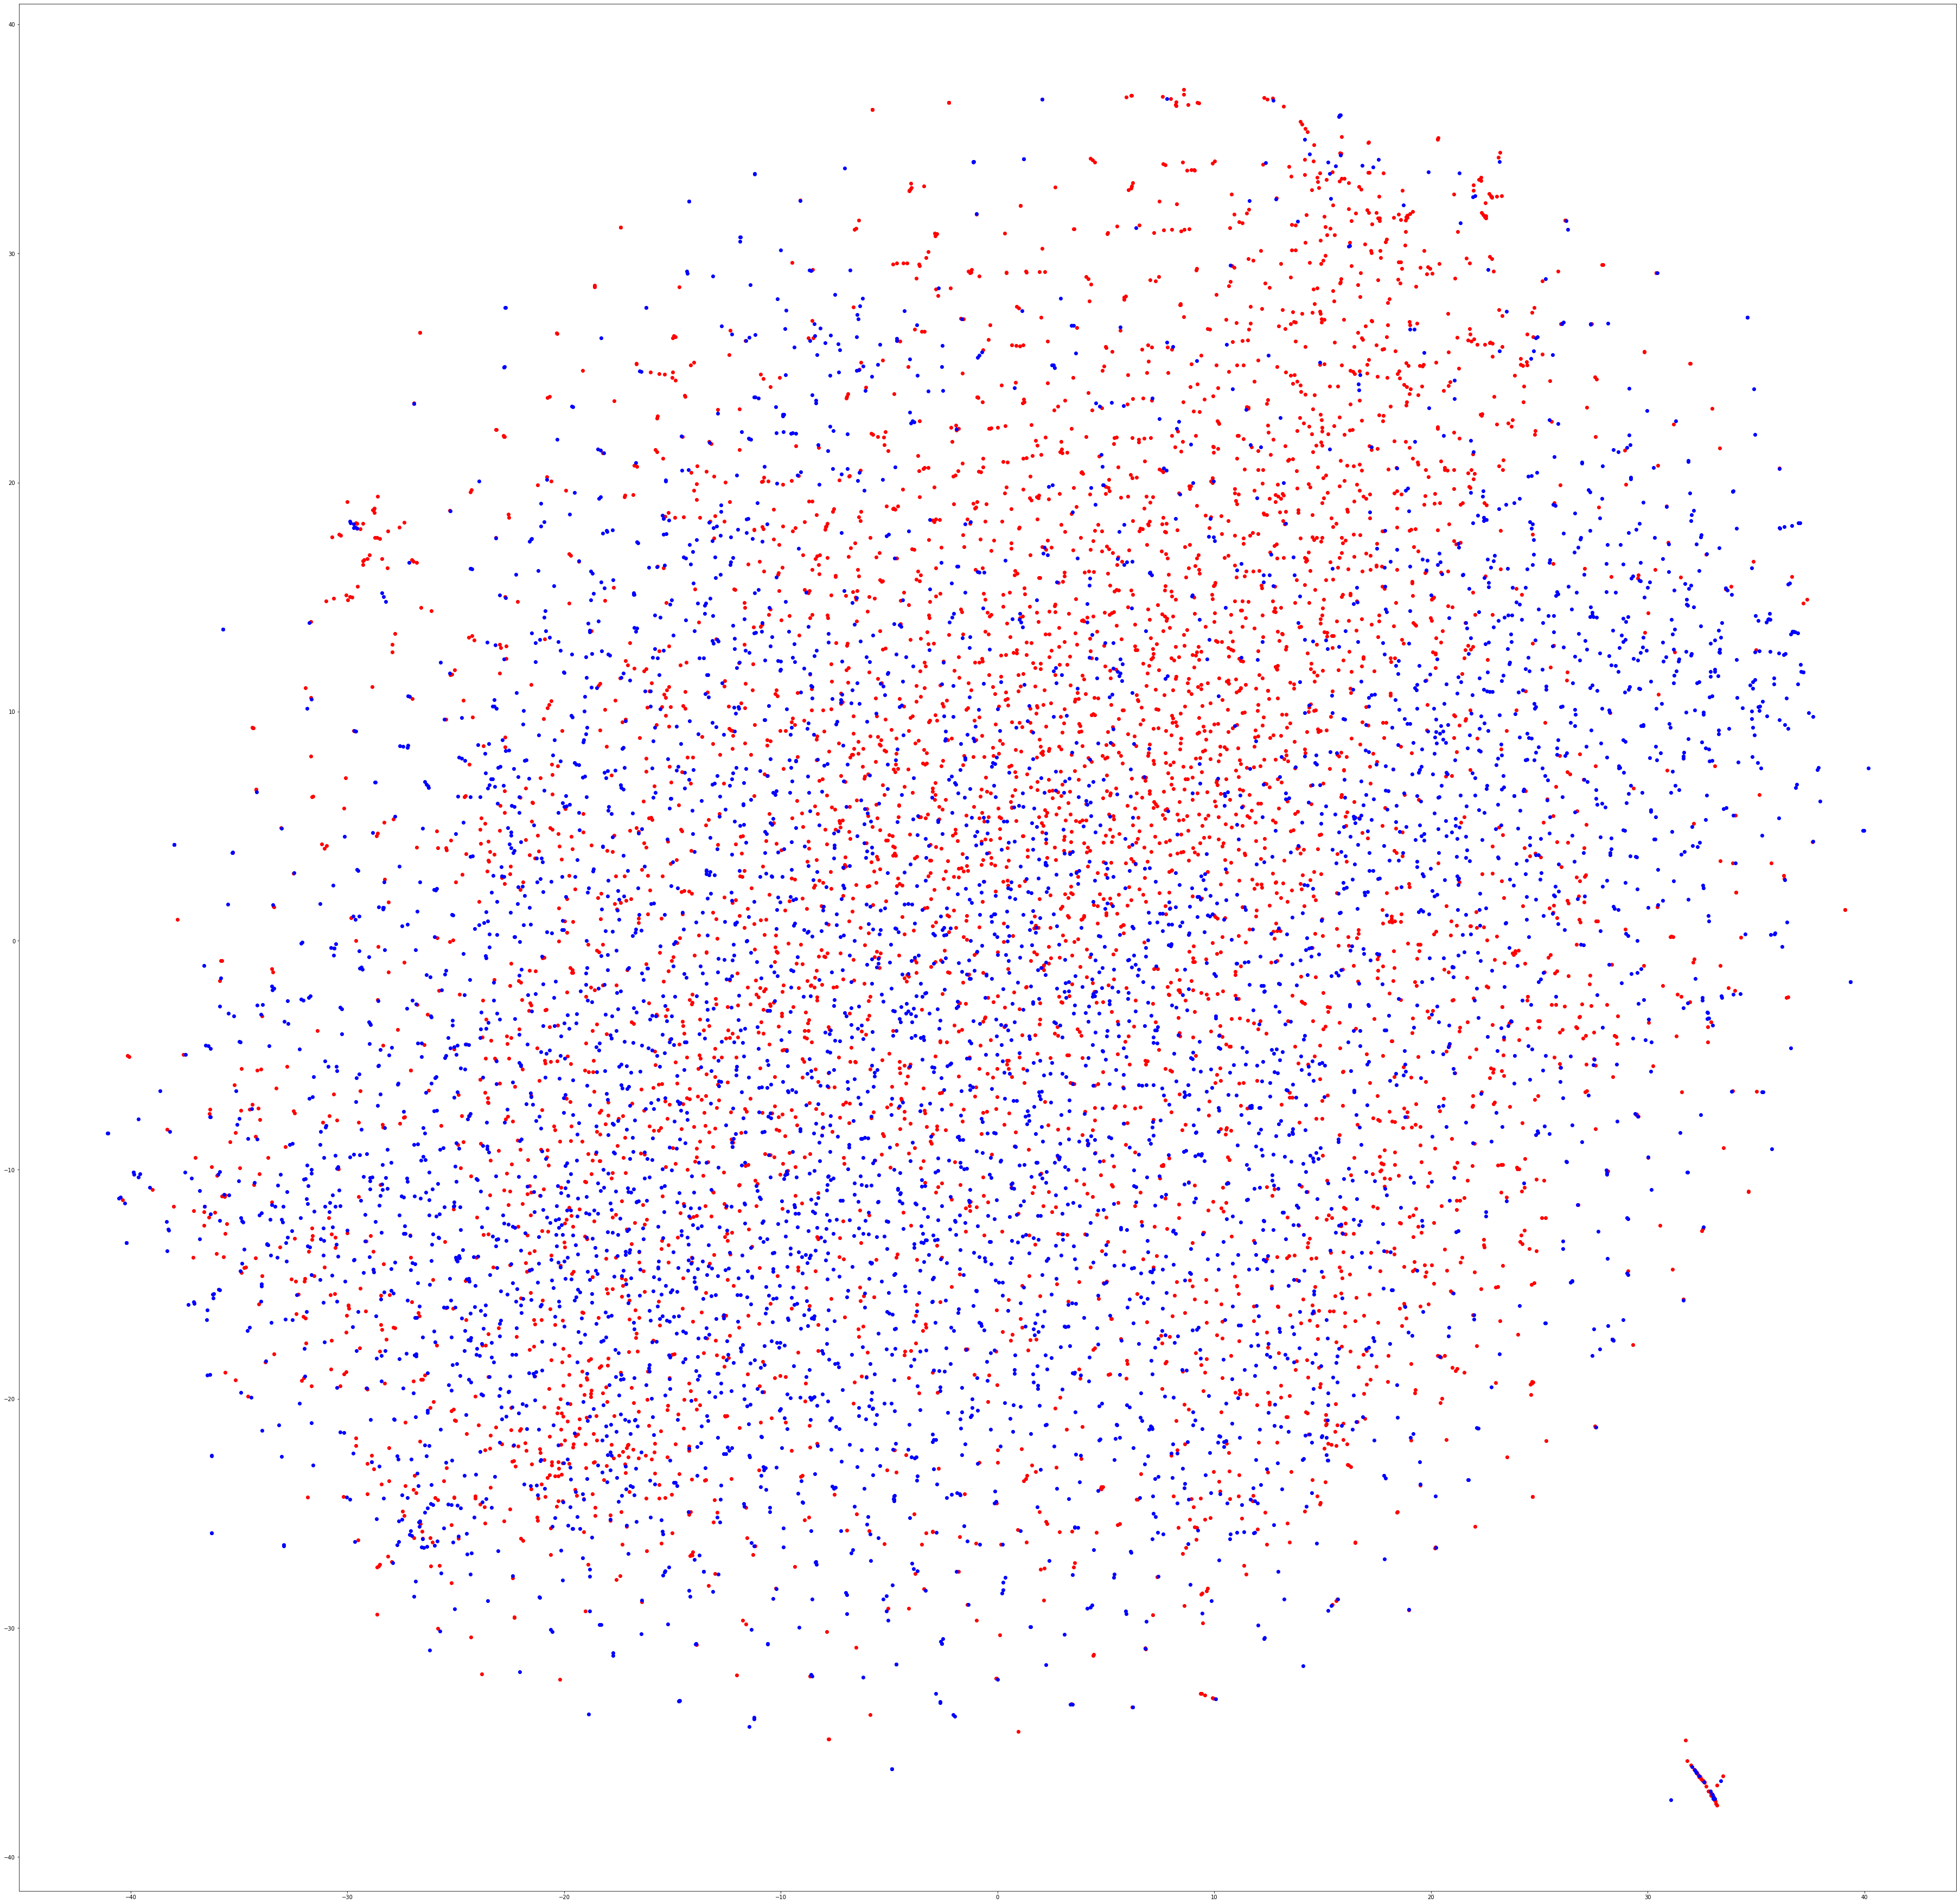

In [2]:
from gensim import models
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
EMBED_DIM = 300

def get_embeddings_average():

    


    average_embeddings = []
    labels = []

 
    word2vec = models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin',binary=True)

   
    f = open("./train.jsonl",'r')
    
    for review in f:
        
        json_review = json.loads(review)
        labels.append(json_review["sentiment"])
        
        sentence_tensor = []

        for word in json_review["text"].split():

            word_embedding = np.zeros((300,))
        
            try : 
                word2vec_vector =  word2vec.get_vector(word)
            except:
                word2vec_vector = np.zeros((EMBED_DIM,))
            word_embedding += word2vec_vector
   

            sentence_tensor.append(word_embedding)
        sentence_tensor = np.stack(sentence_tensor)
        sentence_average_tensor = np.mean(sentence_tensor,axis=0)
        average_embeddings.append(sentence_average_tensor)
    
    #average_embeddings = torch.stack(average_embeddings)
    labels = np.array(labels)

    return (average_embeddings,labels)



def  plot_tsne(embeddings,labels):
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    embeddings_new_values = tsne_model.fit_transform(embeddings)

    x = []
    y = []

    for value in embeddings_new_values : 
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(64,64))
    for i in range(len(x)):
        if(labels[i]==1):
            plt.scatter(x[i],y[i],color="r")
        else:
            plt.scatter(x[i],y[i],color ="b")
    plt.show()
    

avg_embedddings, labels = get_embeddings_average()
plot_tsne(avg_embedddings,labels)



In [ ]:

def get_embeddings_average(params,weights):

    use_word2vec , use_glove , use_fasttext = params
    
    word2vec = None
    glove = None
    fast_text = None

    average_embeddings = []
    labels = []

    if use_word2vec:
        word2vec = models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin',binary=True)

    if use_glove:
        glove = GloVe()

    if use_fasttext:
        fast_text = fasttext.load_model('./crawl-300d-2M-subword/crawl-300d-2M-subword.bin')  

    f = open("./train.jsonl",'r')
    for review in f:
        
        json_review = json.loads(review)
        labels.append(json_review["sentiment"])
        
        sentence_tensor = []

        for word in json_review["text"].split():

            word_embedding = torch.zeros((300,))
            if use_word2vec:
                try : 
                    word2vec_vector = weights[0] * torch.tensor(word2vec.get_vector(word))
                except:
                    word2vec_vector = torch.zeros((EMBED_DIM,))
                word_embedding += word2vec_vector
            if use_glove:
                word_embedding += (weights[1] * glove.__getitem__(word))
            if use_fasttext:
                word_embedding += (weights[2] * torch.tensor(fast_text.get_word_vector(word)))

            sentence_tensor.append(word_embedding)
        sentence_tensor = torch.stack(sentence_tensor)
        sentence_average_tensor = torch.mean(sentence_tensor,dim=0)
        average_embeddings.append(sentence_average_tensor.numpy())
    
    #average_embeddings = torch.stack(average_embeddings)
    labels = np.array(labels)

    return (average_embeddings,labels)



def  plot_tsne(embeddings,labels):
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    embeddings_new_values = tsne_model.fit_transform(embeddings)

    x = []
    y = []

    for value in embeddings_new_values : 
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(64,64))
    for i in range(len(x)):
        if(labels[i]==1):
            plt.scatter(x[i],y[i],color="r")
        else:
            plt.scatter(x[i],y[i],color ="b")
    plt.show()
    

avg_embedddings, labels = get_embeddings_average((True,False,False),(1,0.0,0.0))
plot_tsne(avg_embedddings,labels)